In [23]:
import numpy as np
import matplotlib.pyplot as plt
from LRFutils import archive, progress
from src import plot

In [24]:
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

def plummer(r, a):
    return 3/(4*np.pi*a**3)*(1 + r**2 / a**2)**(-5/2)

---

# Dennsity generation

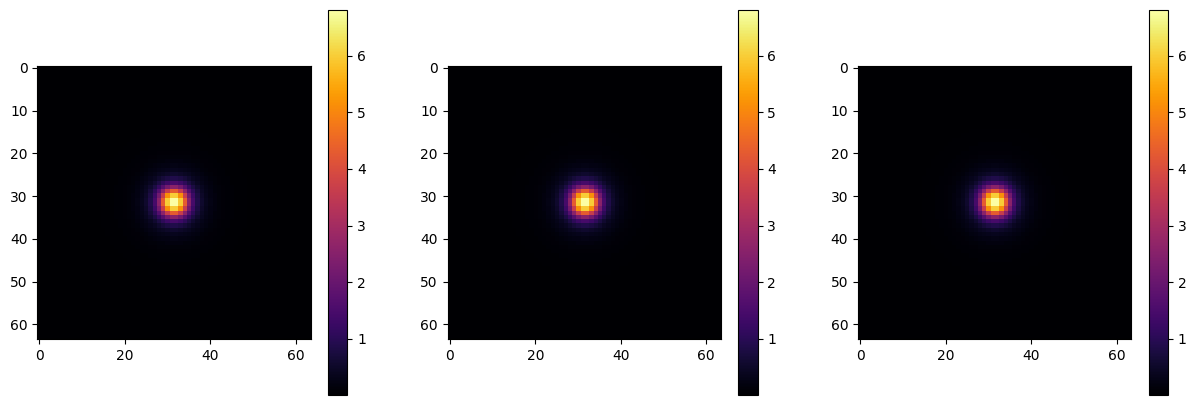

In [25]:
N = 64
space_range = [-1, 1]

r, dr = np.linspace(space_range[0], space_range[1], N, endpoint=True, retstep=True)
X, Y, Z = np.meshgrid(r, r, r)

cloud = 1/(1+(X**2+Y**2+Z**2)**2*10000)
plot.sum_in_3_directions(cloud)

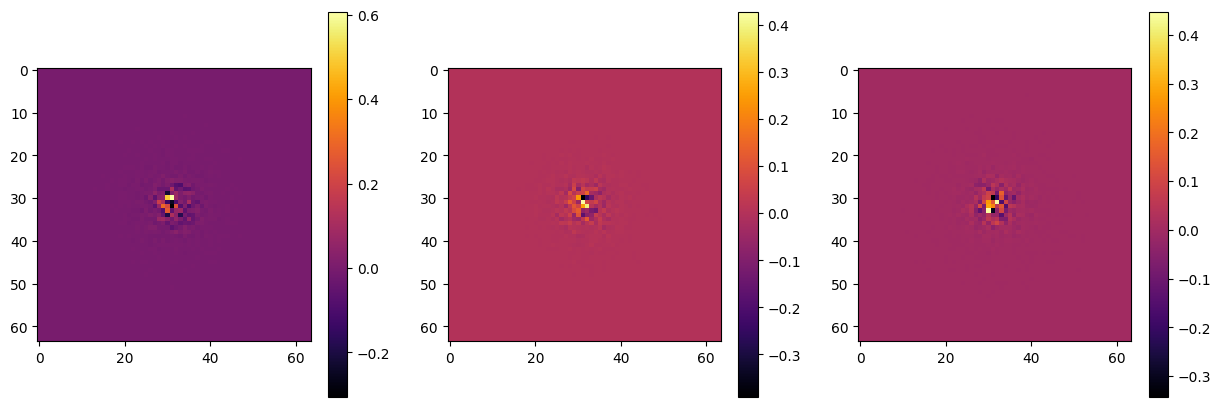

In [26]:
cloud *= np.random.normal(0, 0.1, size=(N, N, N))
plot.sum_in_3_directions(cloud)

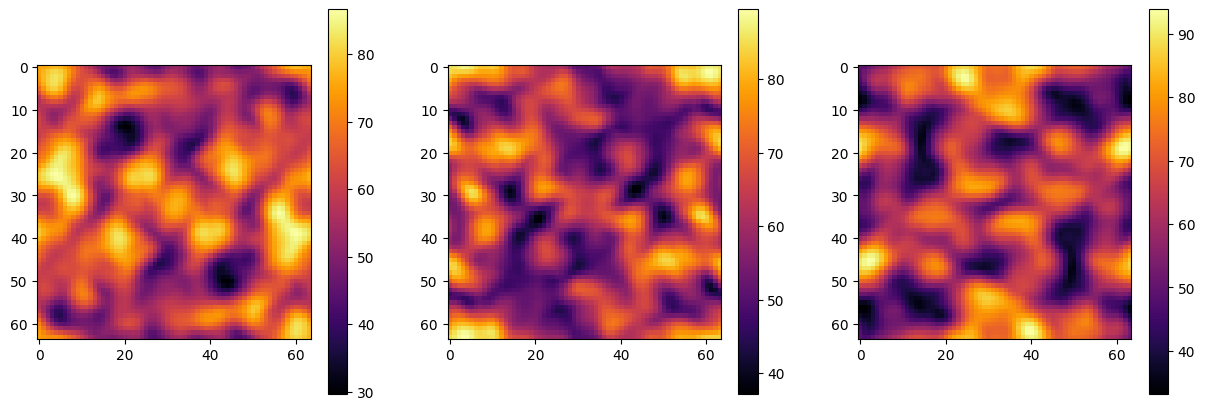

In [27]:

cloud = np.abs(np.fft.fftn(cloud))

plot.sum_in_3_directions(cloud)

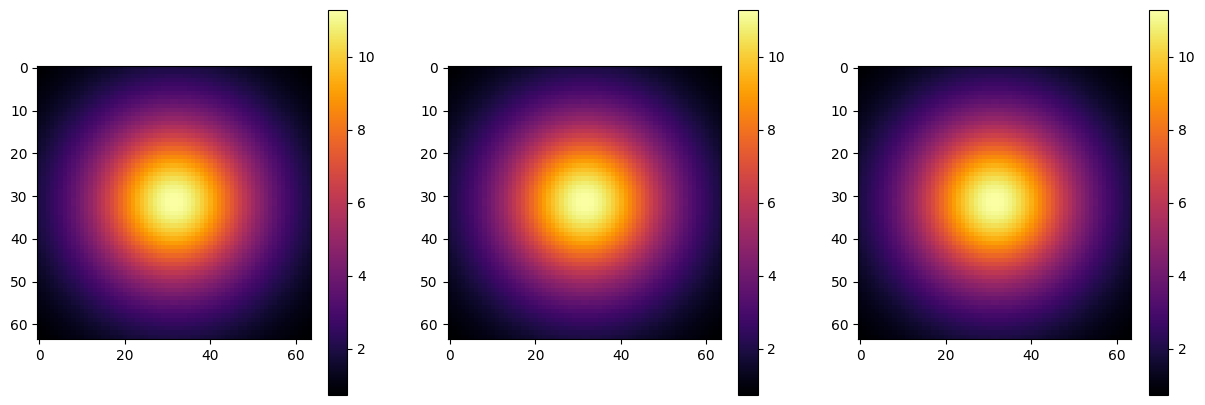

In [28]:
a = 0.9
p = plummer(np.sqrt(X**2+Y**2+Z**2), a)
plot.sum_in_3_directions(p)

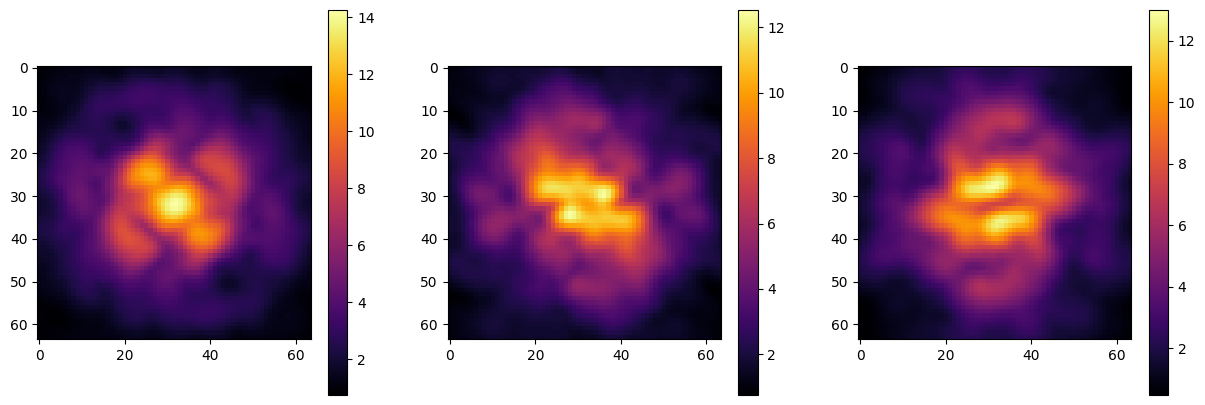

In [29]:
cloud *= p
plot.sum_in_3_directions(cloud)

---

# Velocity generation

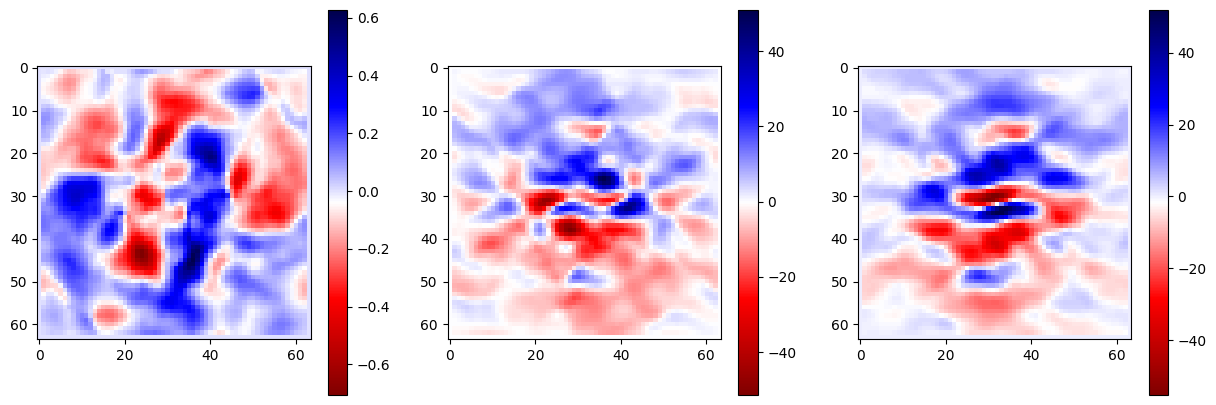

In [30]:
cloud_gradient = np.gradient(cloud, dr)

vx_grad = cloud_gradient[0]
vy_grad = cloud_gradient[1]
vz_grad = cloud_gradient[2]

for v in [vx_grad, vy_grad, vz_grad]:
    v[0,:,:] = 0
    v[-1,:,:] = 0
    v[:,0,:] = 0
    v[:,-1,:] = 0
    v[:,:,0] = 0
    v[:,:,-1] = 0

plot.sum_in_3_directions(vx_grad, "seismic_r")

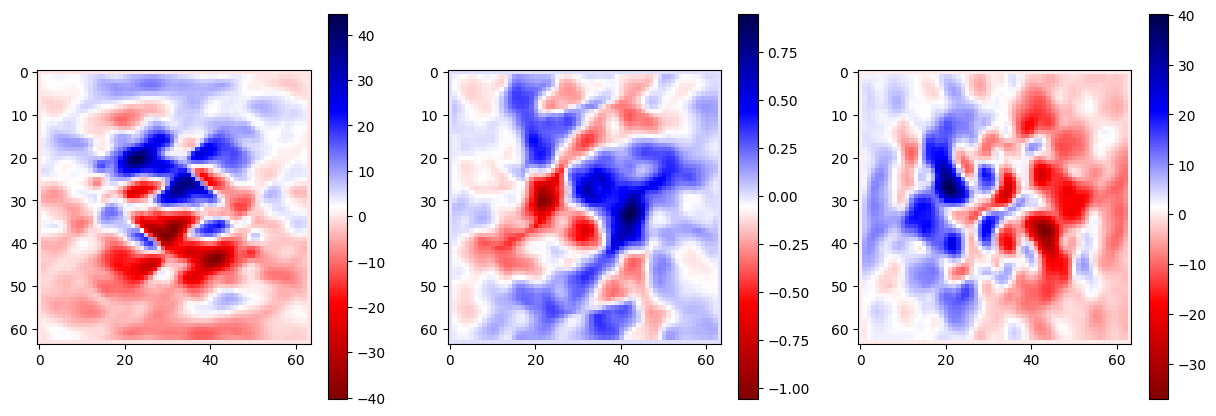

In [31]:
plot.sum_in_3_directions(vy_grad, "seismic_r")

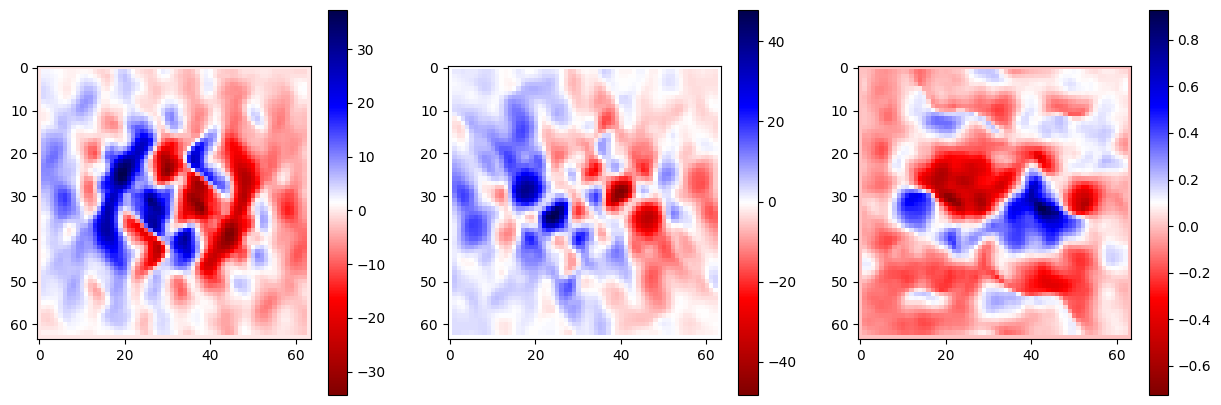

In [32]:
plot.sum_in_3_directions(vz_grad, "seismic_r")

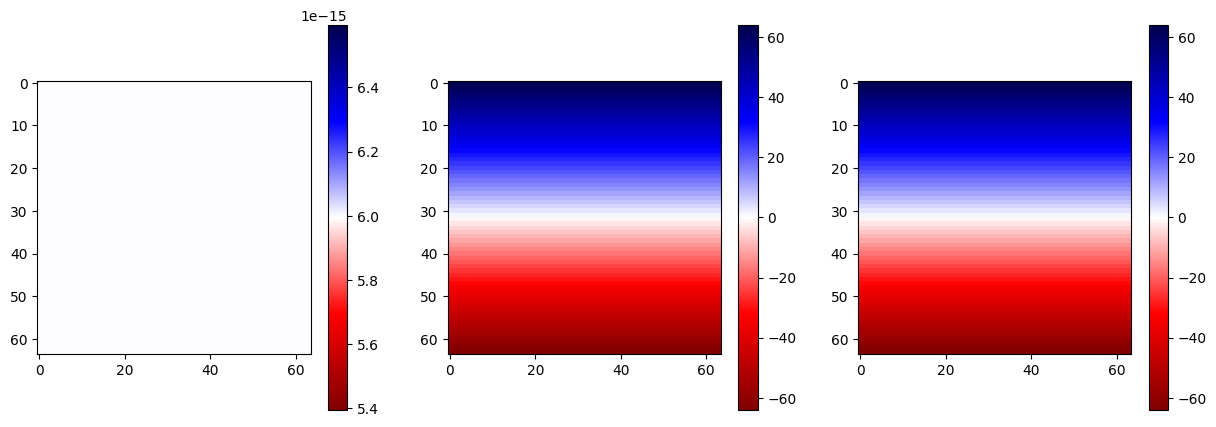

In [33]:
vx_rot = -Y
vy_rot = X
vz_rot = X * 0

plot.sum_in_3_directions(vx_rot, "seismic_r")

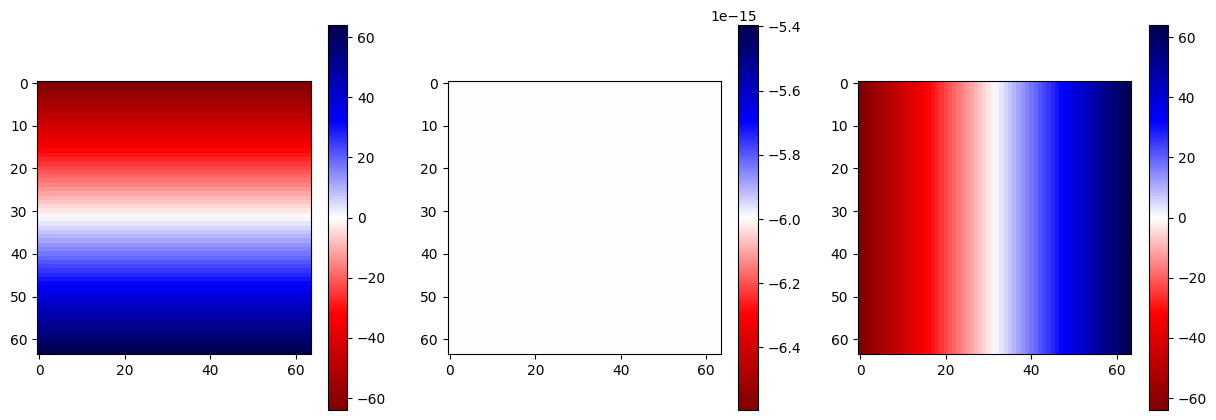

In [34]:

plot.sum_in_3_directions(vy_rot, "seismic_r")

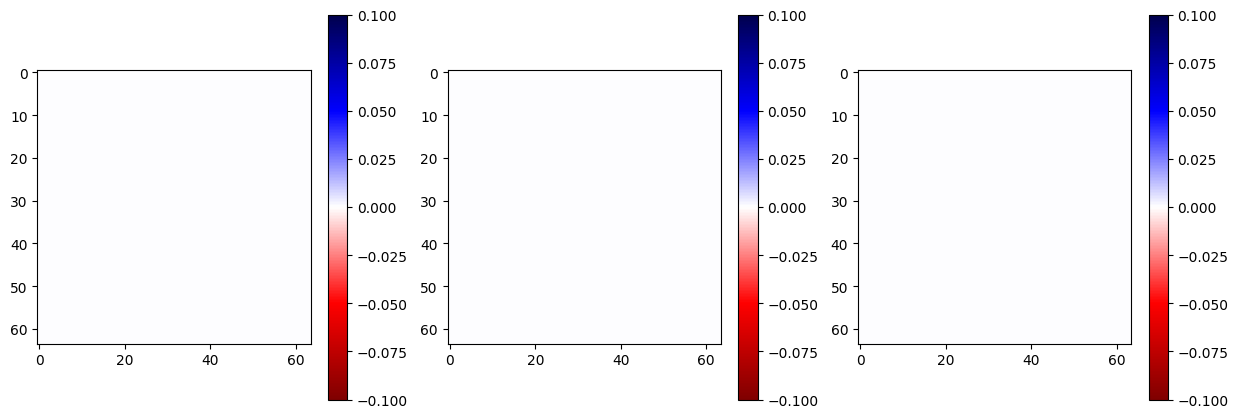

In [35]:

plot.sum_in_3_directions(vz_rot, "seismic_r")

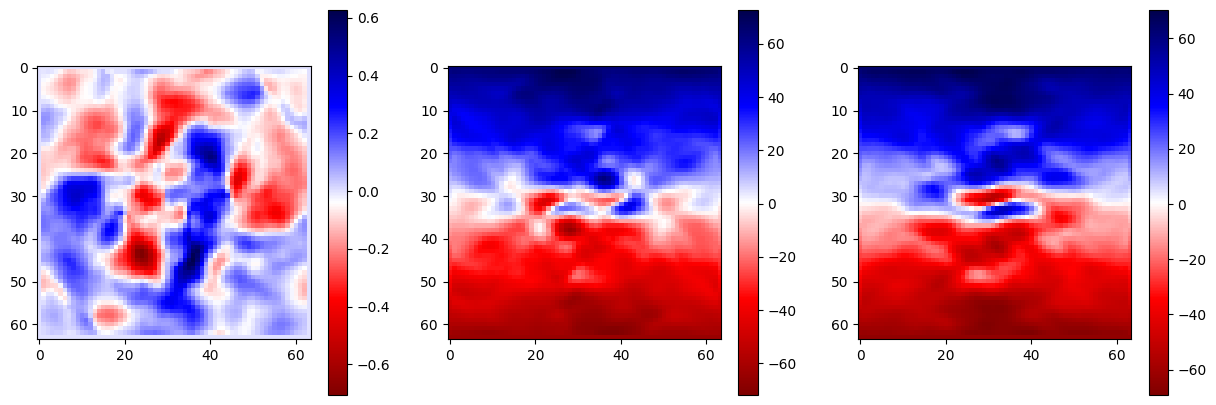

In [36]:
vx = vx_grad + vx_rot
vy = vy_grad + vy_rot
vz = vz_grad + vz_rot

plot.sum_in_3_directions(vx, "seismic_r")

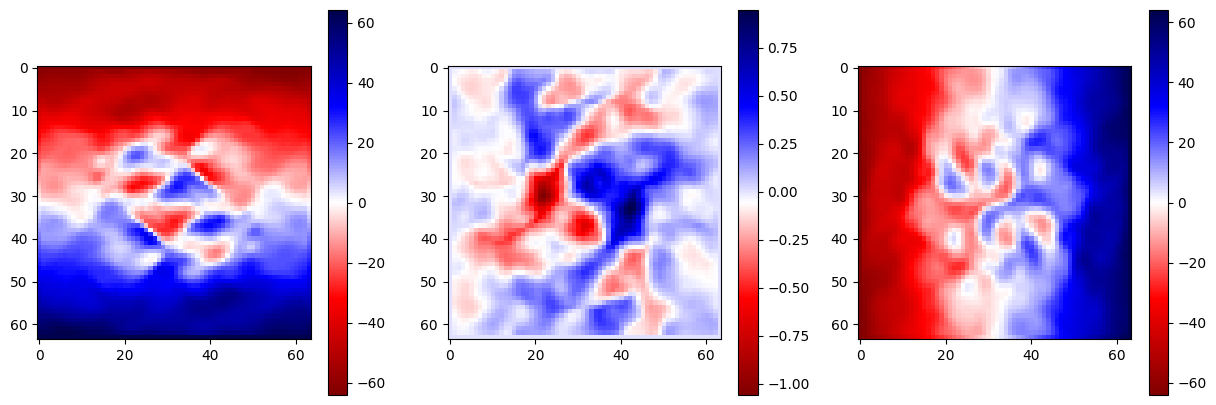

In [37]:
plot.sum_in_3_directions(vy, "seismic_r")

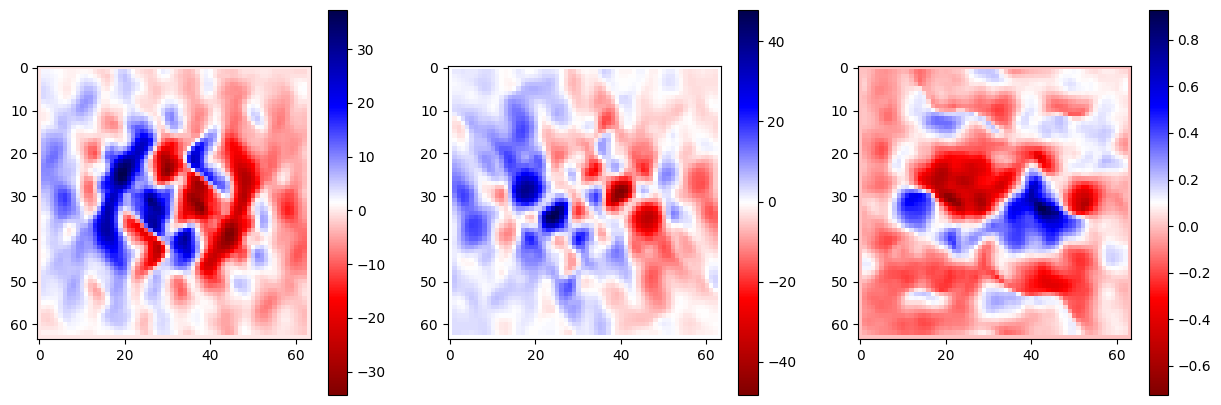

In [38]:
plot.sum_in_3_directions(vz, "seismic_r")    

In [39]:
# Normalization

vx /= np.max(np.abs(vx))
vy /= np.max(np.abs(vy))
vz /= np.max(np.abs(vz))

---

# Spectrum generation

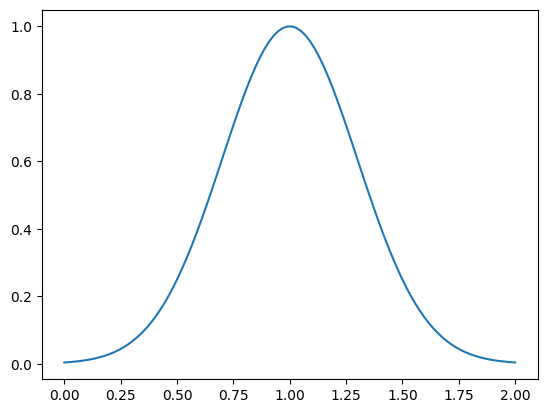

In [40]:
f = np.linspace(0, 2, 100) # frequency range

# def lorentzian(x, mu, gamma):
#     return gamma / np.pi / ((x - mu)**2 + gamma**2)

# def voigt(x, mu, sigma, gamma):
#     return np.real(np.fft.ifft(np.fft.fft(gaussian(x, mu, sigma)) * np.fft.fft(lorentzian(x, mu, gamma))))

gauss_profile = gaussian(f, 1, 0.3)
plt.plot(f, gauss_profile)
plt.show()

In [41]:
spectrum_hypercube_x = np.zeros((N, N, N, 100))
spectrum_hypercube_y = np.zeros((N, N, N, 100))
spectrum_hypercube_z = np.zeros((N, N, N, 100))

for i in range(N):
    for j in range(N):
        for k in range(N):
            spectrum_hypercube_x[i,j,k,:] = gaussian(f+3*vx[i,j,k], 1, 0.3) * cloud[i,j,k]
            spectrum_hypercube_y[i,j,k,:] = gaussian(f+3*vy[i,j,k], 1, 0.3) * cloud[i,j,k]
            spectrum_hypercube_z[i,j,k,:] = gaussian(f+3*vz[i,j,k], 1, 0.3) * cloud[i,j,k]

# Stacking to 2D observation
spectrum_hypercube_x = np.sum(spectrum_hypercube_x, axis=0)
spectrum_hypercube_y = np.sum(spectrum_hypercube_y, axis=1)
spectrum_hypercube_z = np.sum(spectrum_hypercube_z, axis=2)

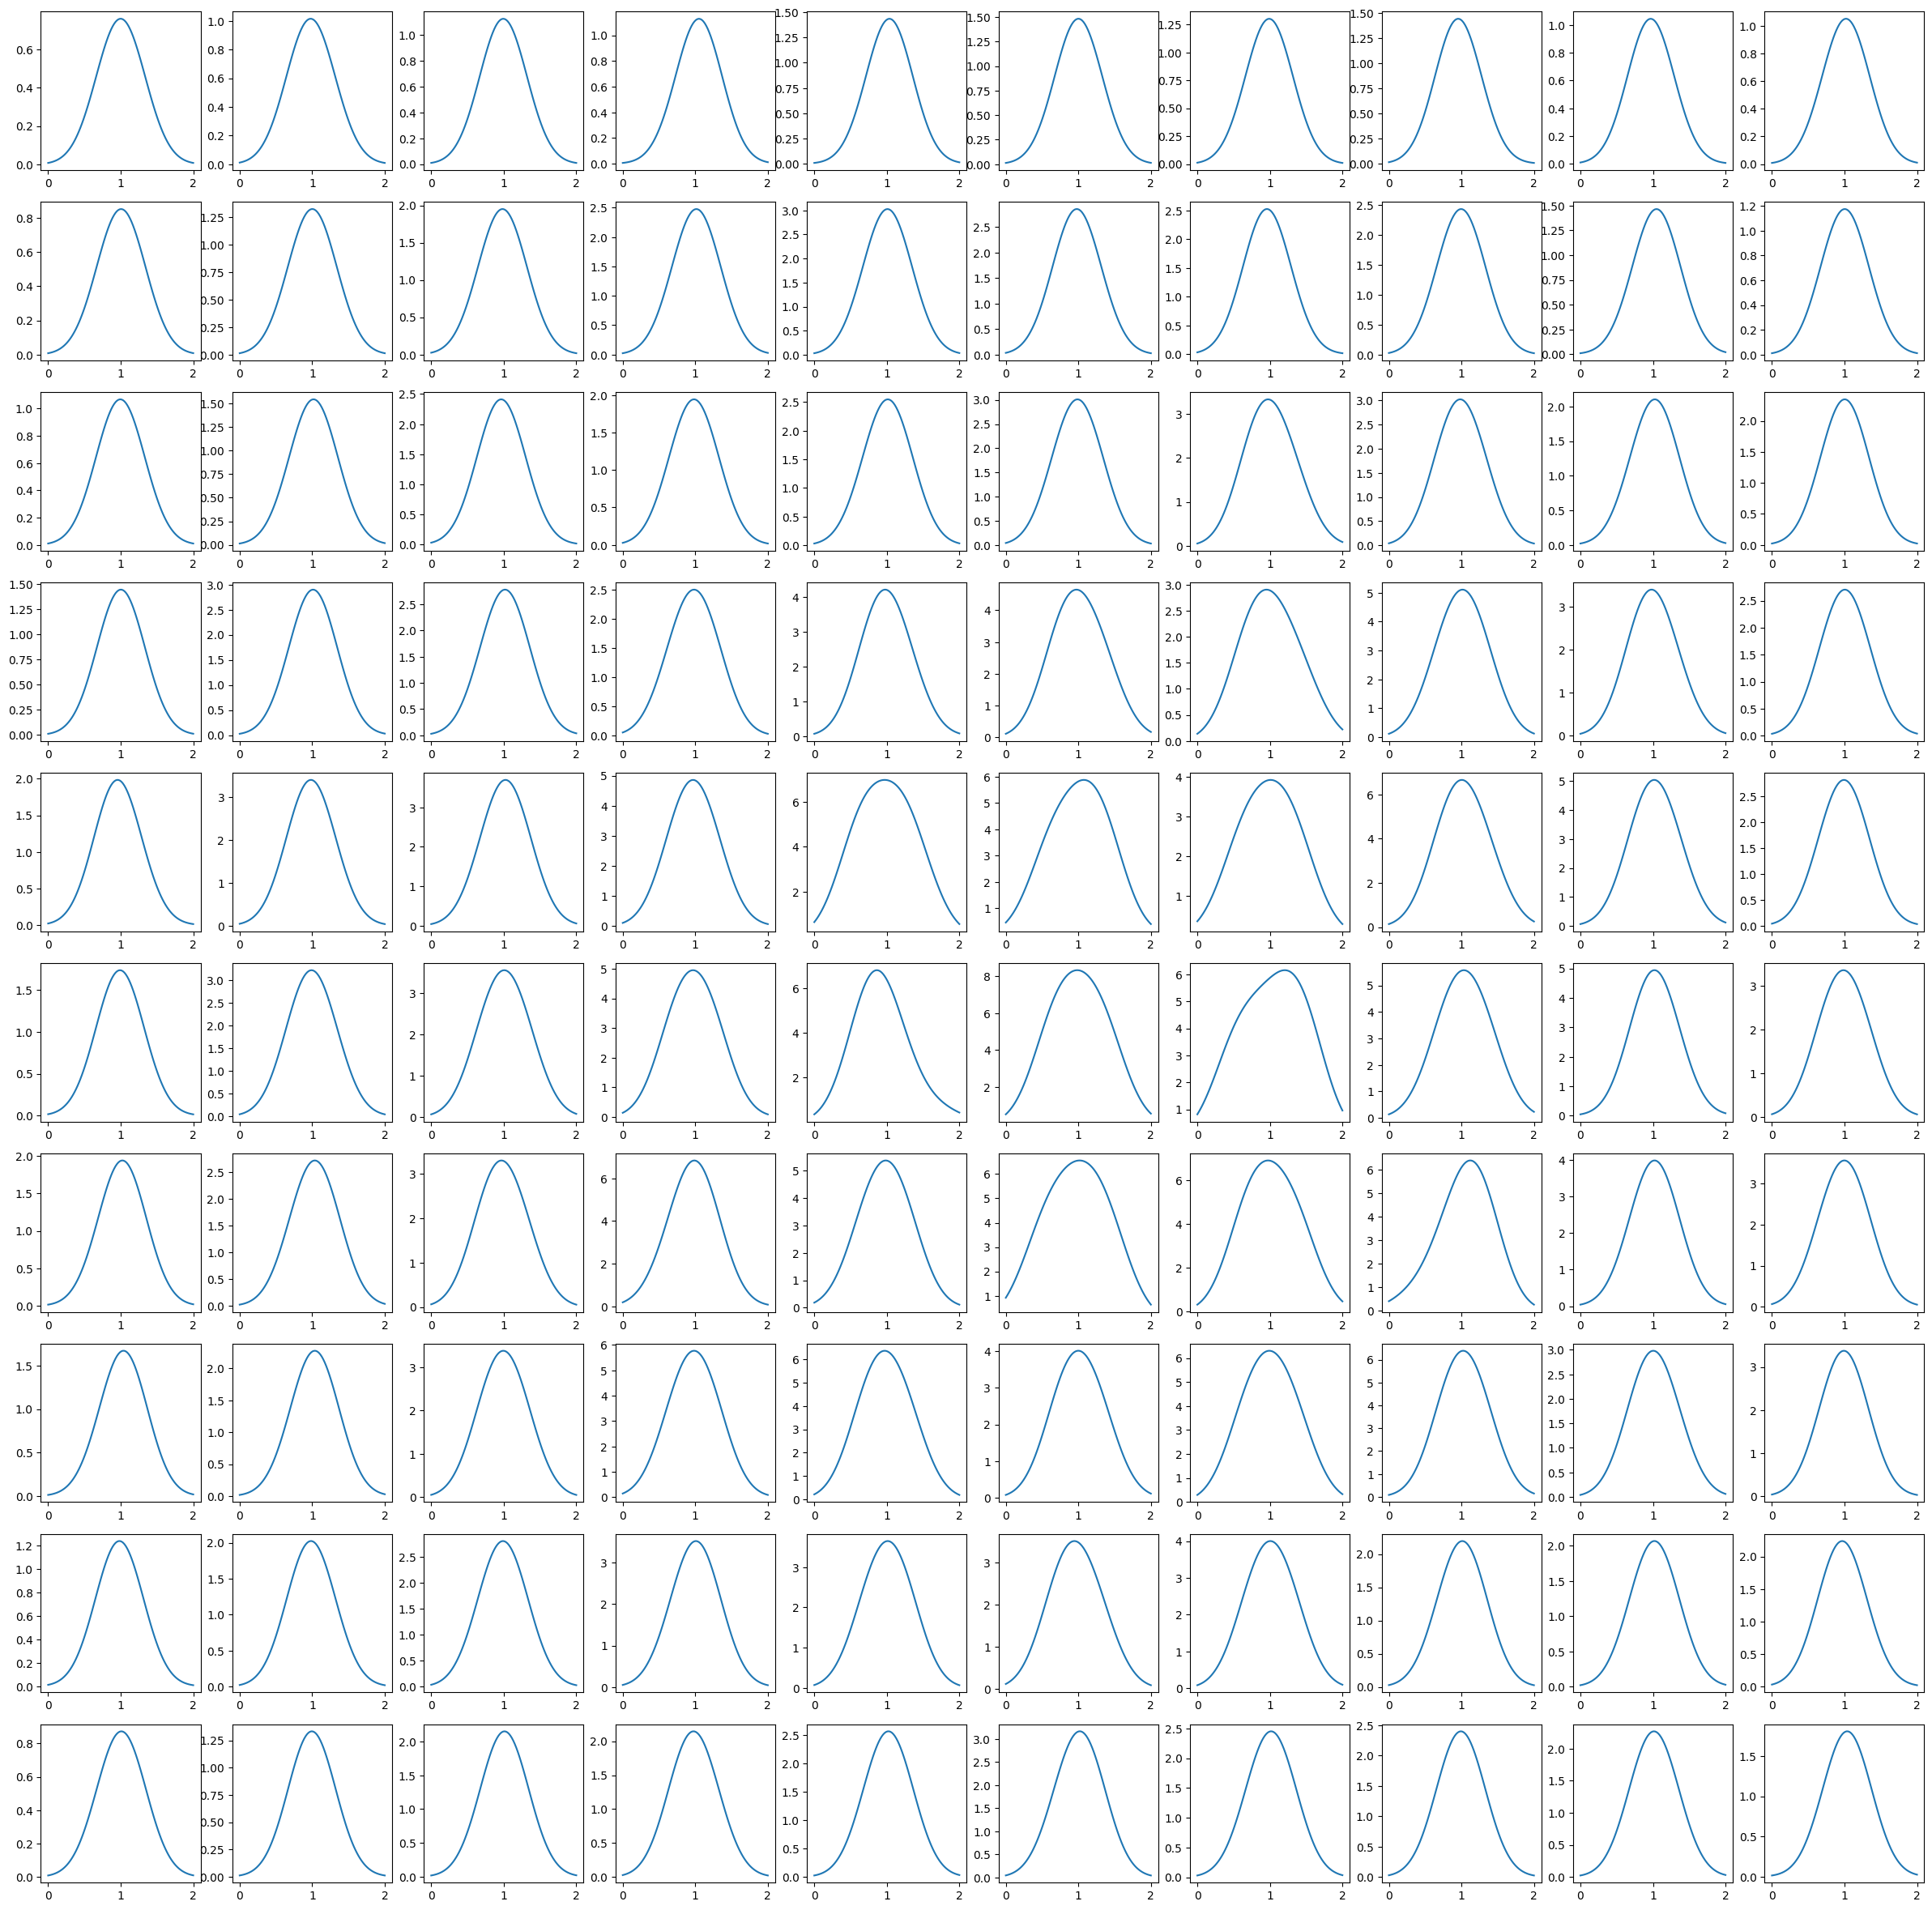

In [42]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30))

repr_x = spectrum_hypercube_x[::N//10,::N//10, :]

for i in range(10):
    for j in range(10):
        axs[i,j].plot(f, repr_x[i,j,:])

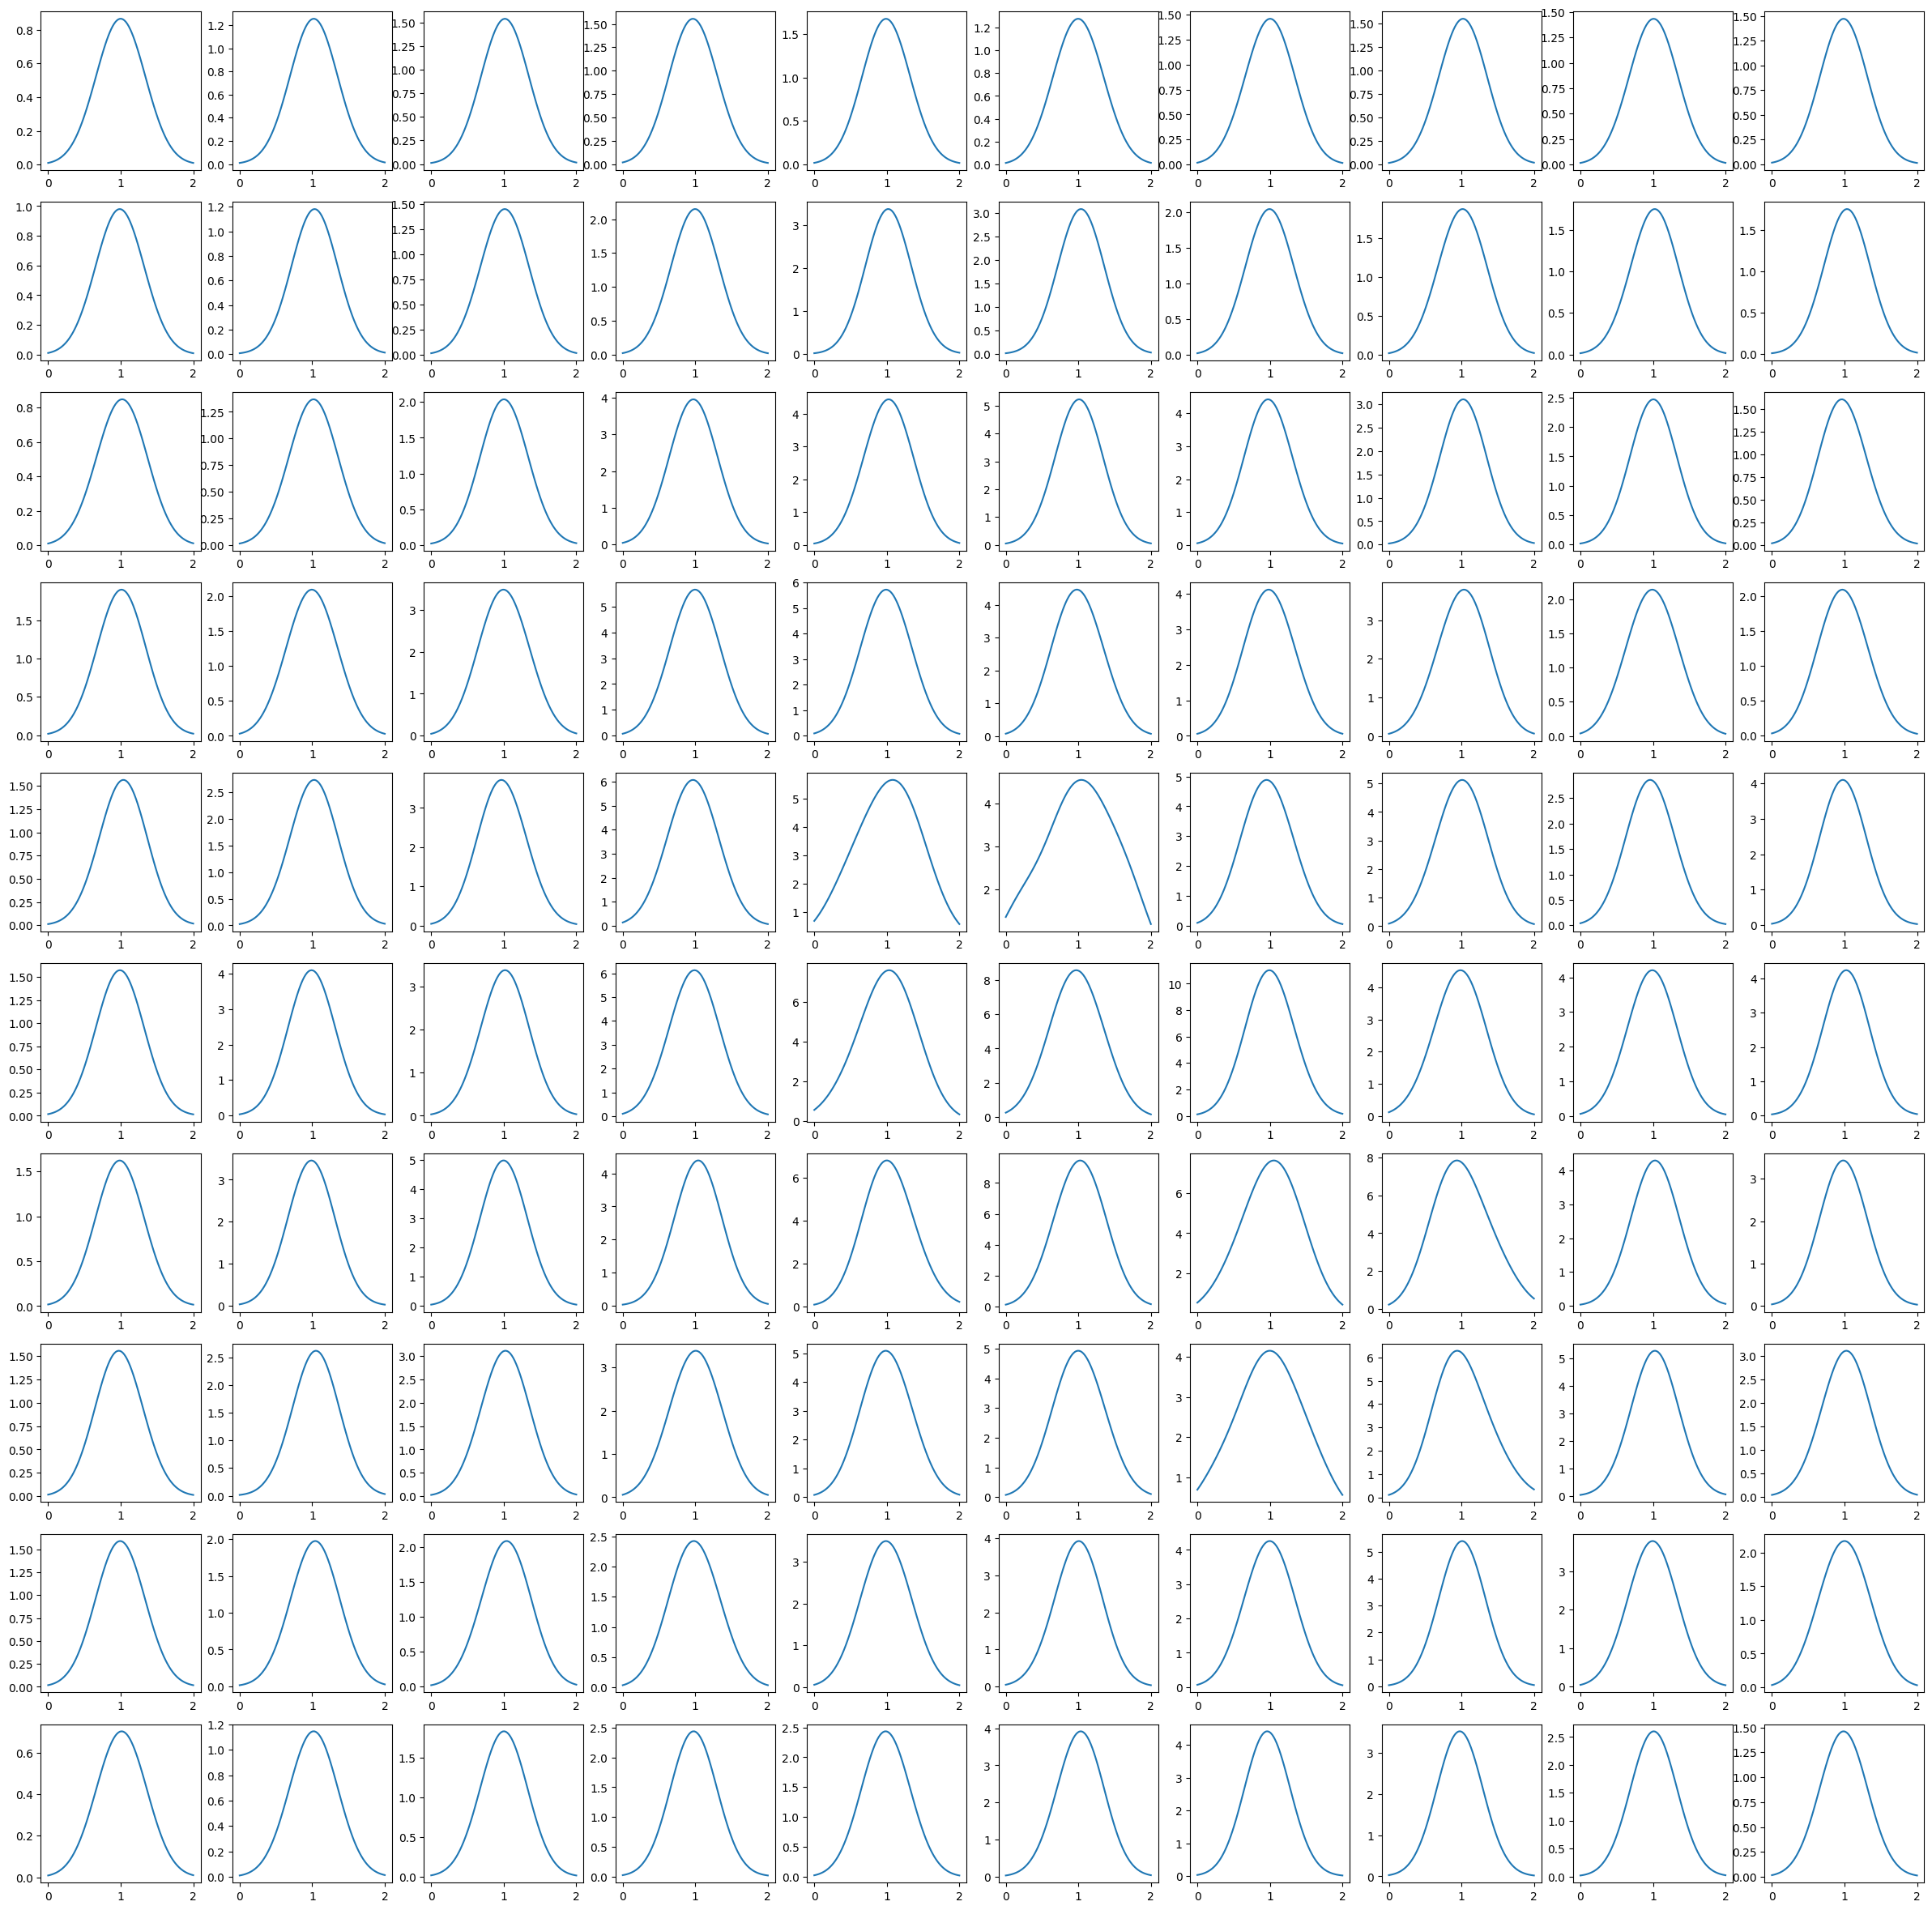

In [43]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30))

repr_y = spectrum_hypercube_y[::N//10,::N//10, :]

for i in range(10):
    for j in range(10):
        axs[i,j].plot(f, repr_y[i,j,:])

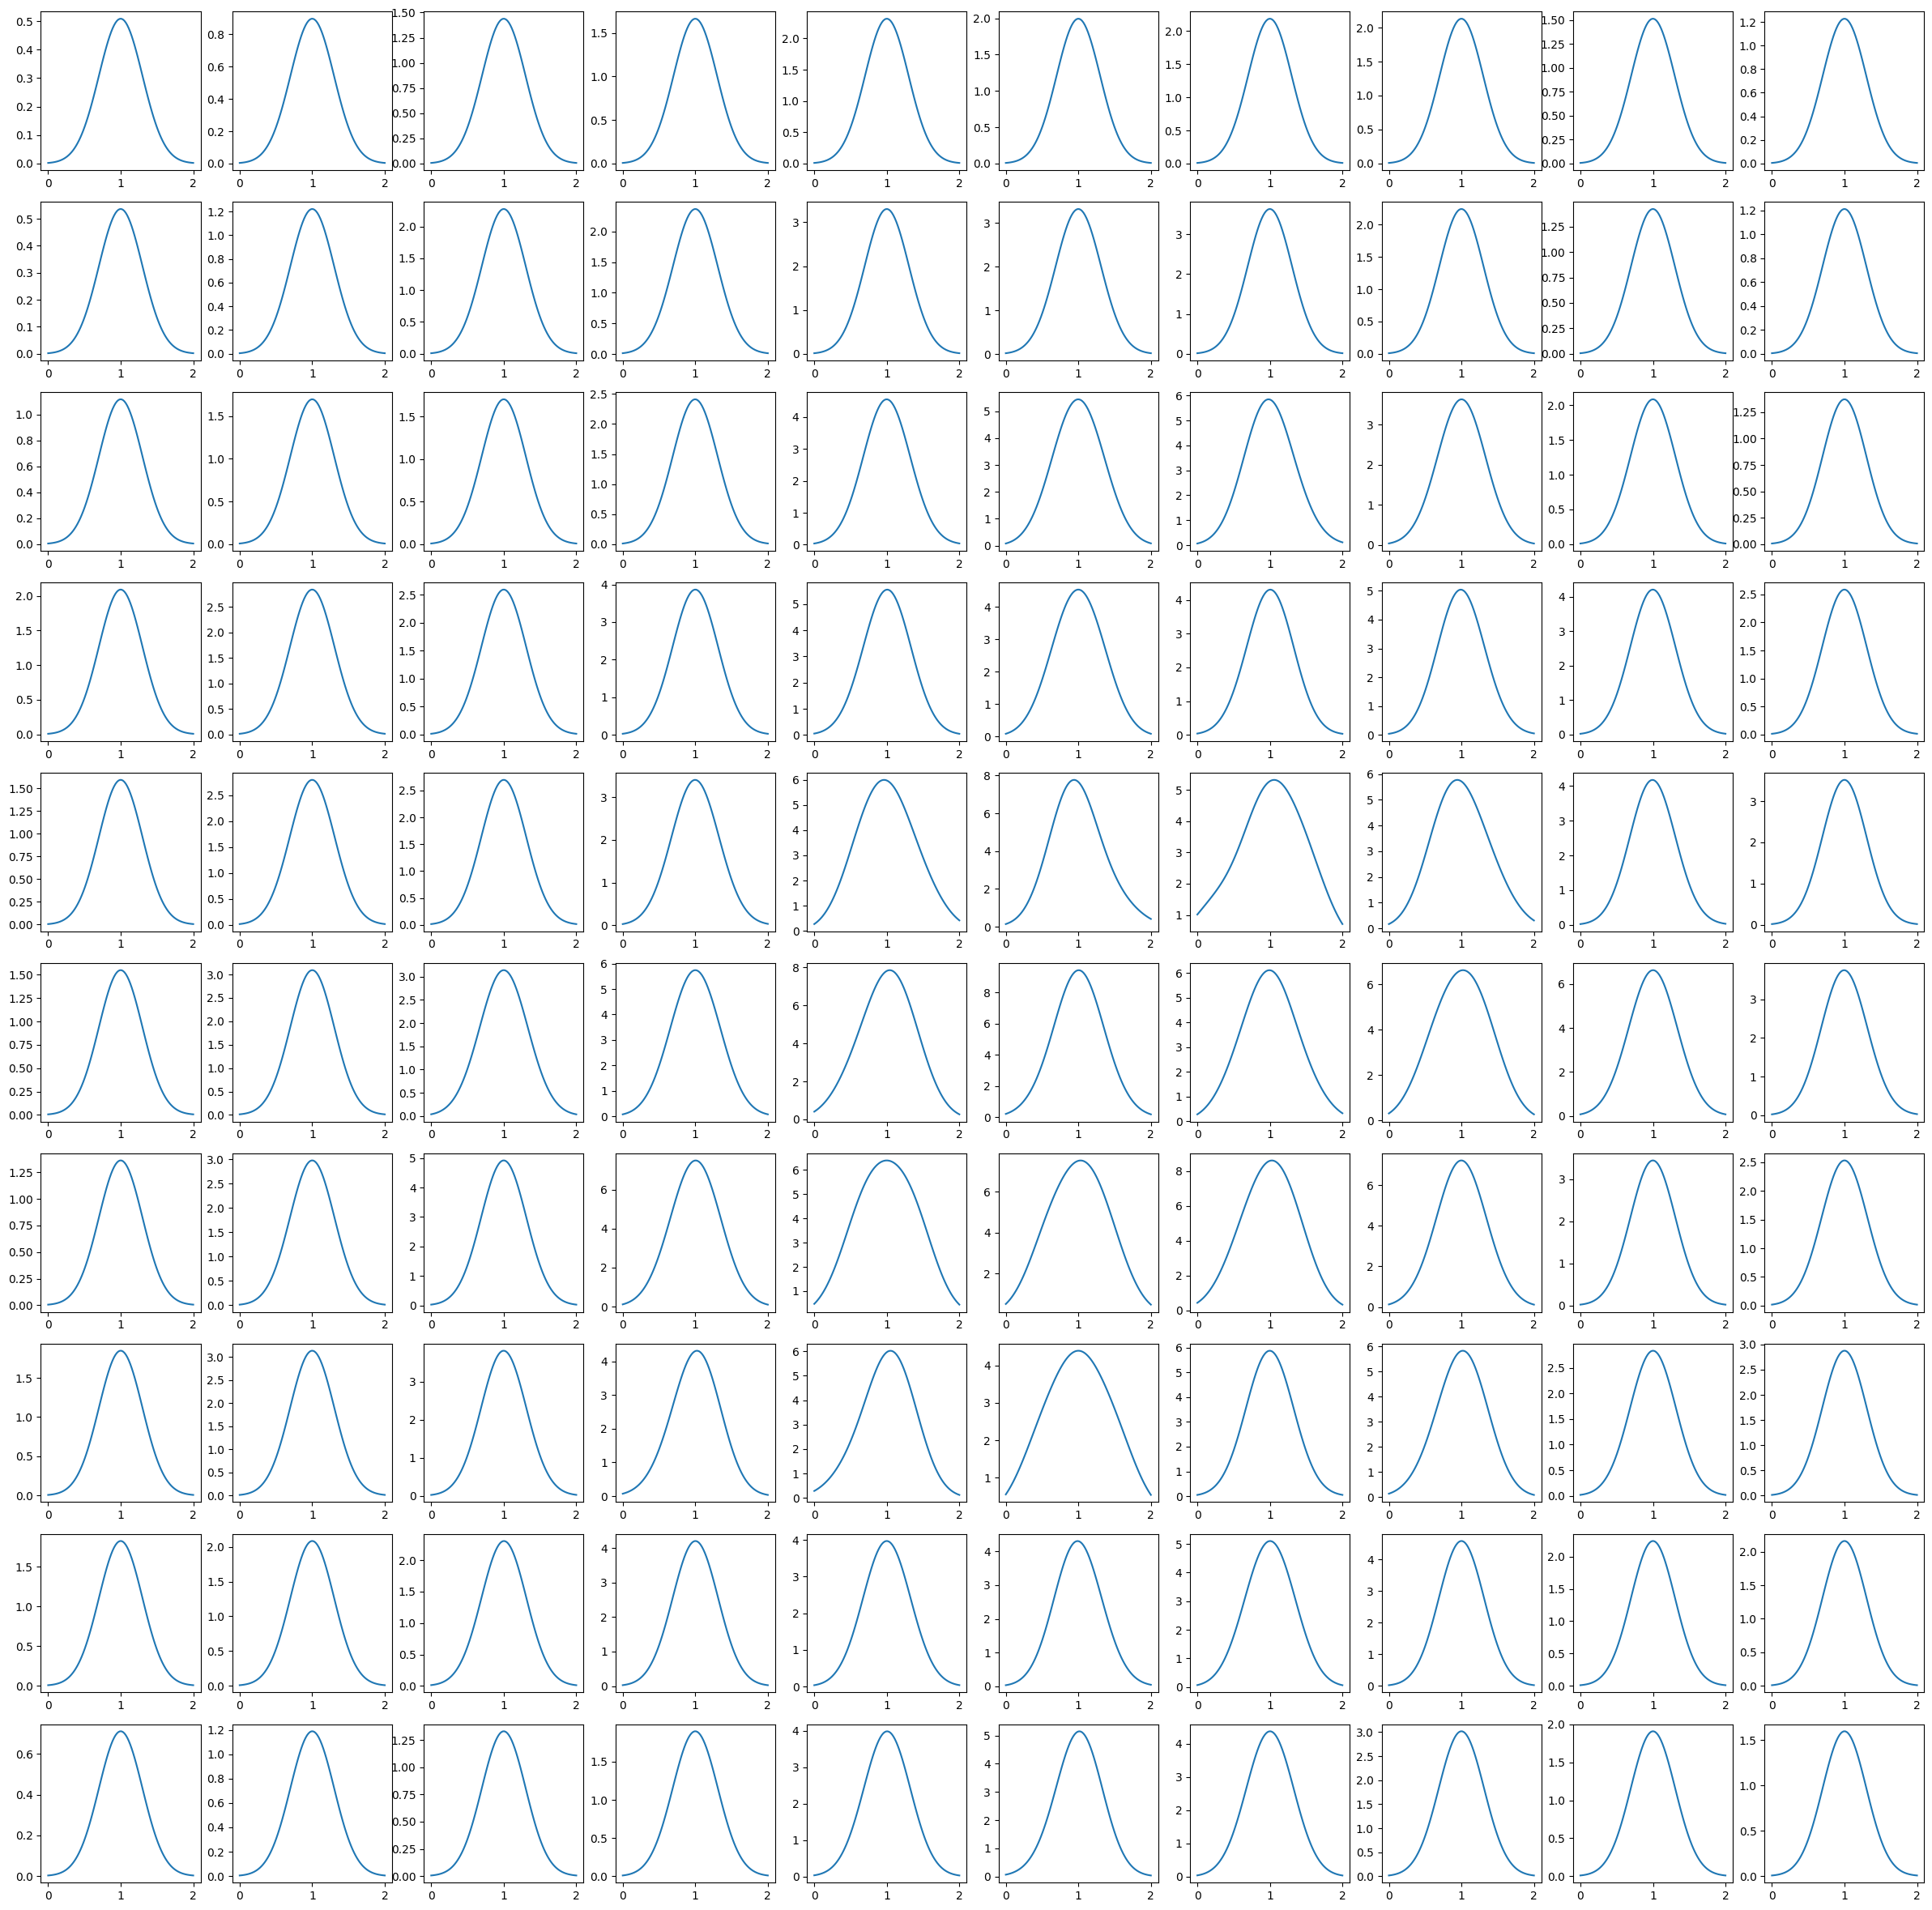

In [44]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30))

repr_z = spectrum_hypercube_z[::N//10,::N//10, :]

for i in range(10):
    for j in range(10):
        axs[i,j].plot(f, repr_z[i,j,:])